In [4]:
import subprocess
import csv
import pandas as pd
import matplotlib.pyplot as plt
import random
#import numpy as np
from matplotlib.patches import Patch


In [5]:

from matplotlib.patches import Patch
#Ploting All Graphs seperately
def graph_separately_display():
	# colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
	bgv_colors = ['blue', 'green', 'red', 'cyan']
	ckks_colors= ['orange', 'purple', 'pink', 'brown']

	data = pd.read_csv("helib_averages.csv")
		
	# Assuming the first column contains the categories
	categories = data.iloc[:, 0]

	# List of columns you want to exclude
	headers_to_filter = ['bgvkeygenRtime' ,'ckkskeygenRtime','bgvencryptTime','ckksencryptTime', 'bgvAddTime','ckksAddTime', 'bgvMultTime','ckksMultTime', 'bgvDecryptTime','ckksDecryptTime']  # Adjust column names as needed

	# Filter out columns to plot
	plt.figure(figsize=(8, 6))
	filtered_data = data[headers_to_filter]
	handles = []
	labels = []
	handles.append(Patch(color=bgv_colors[0]))
	labels.append(f'BGV for Secuirty Params: 16384')
	handles.append(Patch(color=bgv_colors[1]))
	labels.append(f'BGV for Secuirty Params: 32768')
	handles.append(Patch(color=ckks_colors[0]))
	labels.append(f'CKKS for Secuirty Params: 16384')
	handles.append(Patch(color=ckks_colors[1]))
	labels.append(f'CKKS for Secuirty Params: 32768')

	for i, col in enumerate(filtered_data.columns):
		if col.startswith('ckks'):
			colors = ckks_colors
		elif col.startswith('bgv'):
			colors = bgv_colors
		else:
			colors = ['black', 'red'] 

		bottom = None
		for j, row_value in enumerate(filtered_data[col]):
			if bottom is None:
				plt.bar(i, row_value, color=colors[j % len(colors)], label=f'Row {j+1} - {col}', alpha=0.7)
				bottom = row_value
			else:
				plt.bar(i, row_value, color=colors[j % len(colors)], bottom=bottom, label=f'Row {j+1} - {col}', alpha=0.7)
				bottom += row_value
	
	plt.xlabel('Category')
	plt.ylabel('Time in (ms)')
	plt.title(f'HElib - Bar Chart comparing runtimes for different function in  schemes (BGV and CKKS)')
	plt.xticks(rotation=80)
	plt.xticks(range(len(filtered_data.columns)), filtered_data.columns)

	# Adding legend
	print(labels, handles)
	plt.legend(handles, labels, title='Legend', loc='upper left')

	# Showing the plot
	plt.tight_layout()  # Adjust layout to prevent clipping of labels
	plt.show()
	

['BGV for Secuirty Params: 16384', 'BGV for Secuirty Params: 32768', 'CKKS for Secuirty Params: 16384', 'CKKS for Secuirty Params: 32768'] [<matplotlib.patches.Patch object at 0x7f981873b3d0>, <matplotlib.patches.Patch object at 0x7f981873b490>, <matplotlib.patches.Patch object at 0x7f981873b520>, <matplotlib.patches.Patch object at 0x7f981873b5e0>]


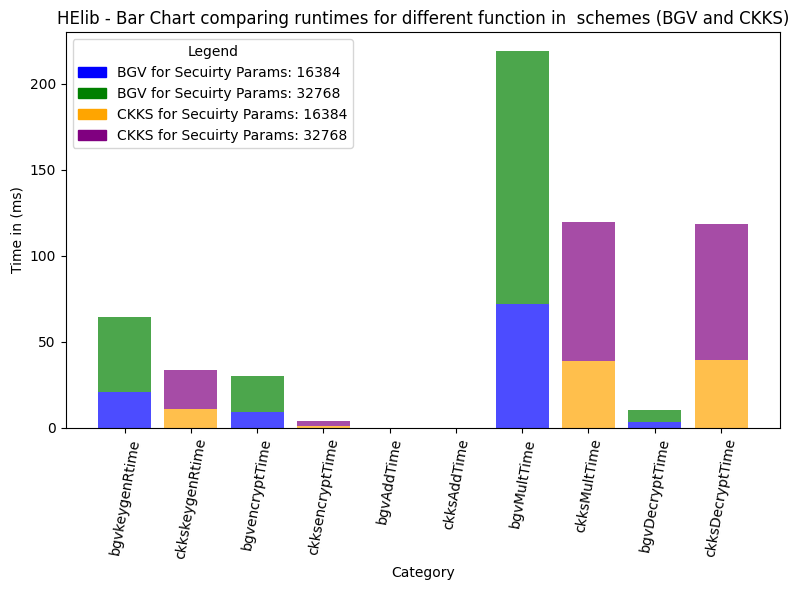

In [6]:
graph_separately_display()

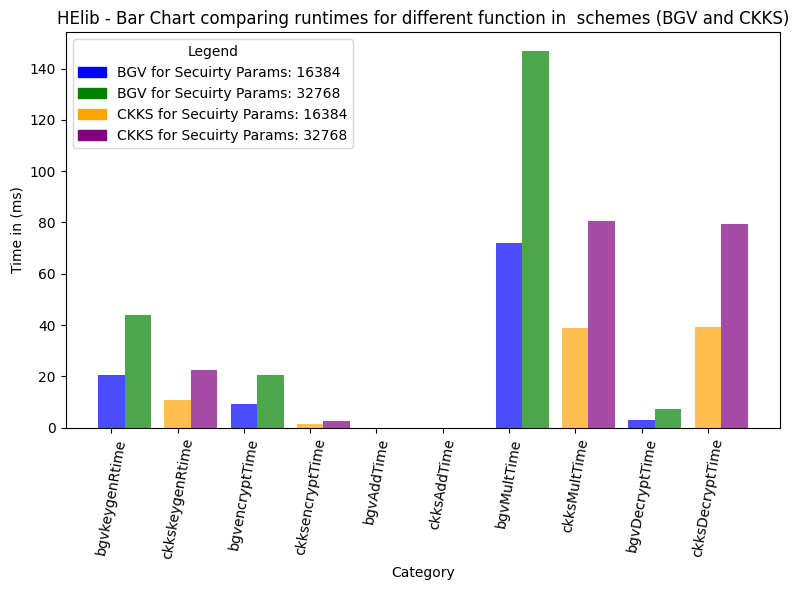

In [410]:

def graph_separately_display():
	# colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
	bgv_colors = ['blue', 'green', 'red', 'cyan']
	ckks_colors= ['orange', 'purple', 'pink', 'brown']

	data = pd.read_csv("helib_averages.csv")
		
	# Assuming the first column contains the categories
	categories = data.iloc[:, 0]
	bar_width = 0.4

	# List of columns you want to exclude
	headers_to_filter = ['bgvkeygenRtime' ,'ckkskeygenRtime','bgvencryptTime','ckksencryptTime', 'bgvAddTime','ckksAddTime', 'bgvMultTime','ckksMultTime', 'bgvDecryptTime','ckksDecryptTime']  # Adjust column names as needed

	# Filter out columns to plot
	plt.figure(figsize=(8, 6))
	filtered_data = data[headers_to_filter]
	handles = []
	labels = []
	handles.append(Patch(color=bgv_colors[0]))
	labels.append(f'BGV for Secuirty Params: 16384')
	handles.append(Patch(color=bgv_colors[1]))
	labels.append(f'BGV for Secuirty Params: 32768')
	handles.append(Patch(color=ckks_colors[0]))
	labels.append(f'CKKS for Secuirty Params: 16384')
	handles.append(Patch(color=ckks_colors[1]))
	labels.append(f'CKKS for Secuirty Params: 32768')

	for i, col in enumerate(filtered_data.columns):
		if col.startswith('ckks'):
			colors = ckks_colors
		elif col.startswith('bgv'):
			colors = bgv_colors
		else:
			colors = ['black', 'red'] 

		bottom = None
		for j, row_value in enumerate(filtered_data[col]):
			plt.bar(i + j * bar_width, row_value, color=colors[j % len(colors)],  alpha=0.7, width=bar_width)
	
	plt.xlabel('Category')
	plt.ylabel('Time in (ms)')
	plt.title(f'HElib - Bar Chart comparing runtimes for different function in  schemes (BGV and CKKS)')
	plt.xticks(rotation=80)
	plt.xticks(range(len(filtered_data.columns)), filtered_data.columns)

	plt.legend(handles, labels, title='Legend', loc='upper left')

	# Showing the plot
	plt.tight_layout()  # Adjust layout to prevent clipping of labels
	plt.show()
graph_separately_display()

In [328]:
target_value = 32768

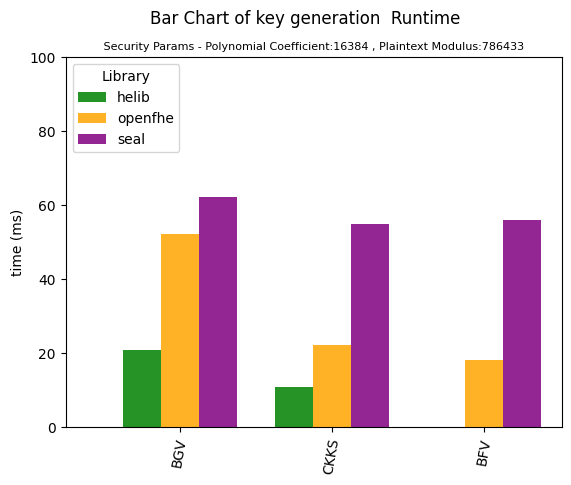

In [420]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Initialize bgvdata as an empty list
bgvdata = []
ckksdata = []
bfvdata = []
libraries = []
colors = ['green', 'orange', 'purple', 'cyan']
bgv_colors = ['blue', 'green', 'red', 'cyan']
ckks_colors= ['orange', '', 'pink', 'brown']
labels = ['BGV', 'CKKS', 'BFV']

securityParams = ['16384','32768', '65536']

Plaintext_modulus = 786433
target_value = 16384
poly_coeff = target_value

# Read data from CSV files into a dictionary of DataFrames
for file, columns in [('helib_averages.csv', ['bgvkeygenRtime', 'ckkskeygenRtime']),
                      ('openfhe_averages.csv', ['bgvkeygenRtime', 'ckkskeygenRtime','bfvkeygenRtime']),
                      ('seal_averages.csv', ['bgvkeygenRtime', 'ckkskeygenRtime','bfvkeygenRtime'])]:
    df = pd.read_csv(file)
    filtered_data = df[df['securityParam'] == target_value]
    filtered_data = filtered_data[columns]
    bgvdata.extend(filtered_data['bgvkeygenRtime'].values)
    ckksdata.extend(filtered_data['ckkskeygenRtime'].values)
    if 'bfvkeygenRtime' in filtered_data.columns:
        bfvdata.extend(filtered_data['bfvkeygenRtime'].values)
    else:
        bfvdata.extend({0})
    libraries.extend([file.split('_')[0]] * len(filtered_data))

# Set the width of the bars
bar_width = 1
index = np.arange(len(bgvdata))


# Plotting the bars chart with colored bars
for i, (x, bgv, library) in enumerate(zip(index, bgvdata, libraries)):
    plt.bar(x+2, bgv, width=bar_width, color=colors[i % len(colors)],  alpha=0.85, label=library)

for i, (x, ckks, library) in enumerate(zip(index, ckksdata, libraries)):
    plt.bar(x+6, ckks, width=bar_width, color=colors[i % len(colors)],  alpha=0.85)

for i, (x, ckks, library) in enumerate(zip(index, bfvdata, libraries)):
    plt.bar(x+10, ckks, width=bar_width, color=colors[i % len(colors)],  alpha=0.85)

plt.ylabel('time (ms)')
plt.suptitle('Bar Chart of key generation  Runtime', fontsize=12)
plt.title(f' Security Params - Polynomial Coefficient:{poly_coeff} , Plaintext Modulus:{Plaintext_modulus} ',fontsize=8)
# plt.ylim(0, 100)  # 10% padding above the maximum value
plt.xticks(index, range(len(bgvdata)))
plt.xticks(rotation=80)
tick_positions = [3, 7, 11]
plt.xticks(tick_positions, labels)
plt.legend(title='Library', loc='upper left')
plt.show()

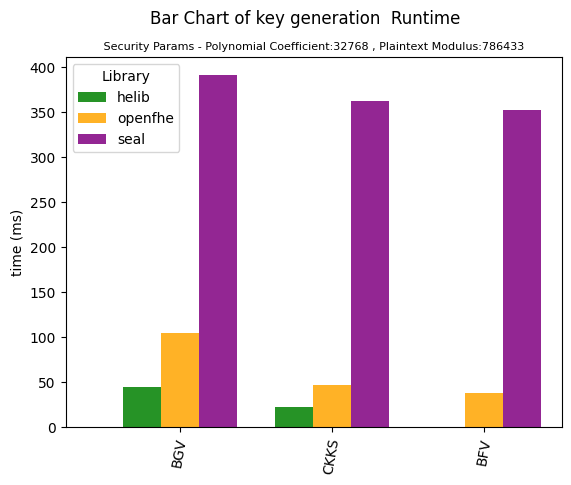

In [422]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Initialize bgvdata as an empty list
bgvdata = []
ckksdata = []
bfvdata = []
libraries = []
colors = ['green', 'orange', 'purple', 'cyan']
bgv_colors = ['blue', 'green', 'red', 'cyan']
ckks_colors= ['orange', '', 'pink', 'brown']
labels = ['BGV', 'CKKS', 'BFV']

Plaintext_modulus = 786433
target_value = 32768
poly_coeff = target_value

# Read data from CSV files into a dictionary of DataFrames
for file, columns in [('helib_averages.csv', ['bgvkeygenRtime', 'ckkskeygenRtime']),
                      ('openfhe_averages.csv', ['bgvkeygenRtime', 'ckkskeygenRtime','bfvkeygenRtime']),
                      ('seal_averages.csv', ['bgvkeygenRtime', 'ckkskeygenRtime','bfvkeygenRtime'])]:
    df = pd.read_csv(file)
    filtered_data = df[df['securityParam'] == target_value]
    filtered_data = filtered_data[columns]
    bgvdata.extend(filtered_data['bgvkeygenRtime'].values)
    ckksdata.extend(filtered_data['ckkskeygenRtime'].values)
    if 'bfvkeygenRtime' in filtered_data.columns:
        bfvdata.extend(filtered_data['bfvkeygenRtime'].values)
    else:
        bfvdata.extend({0})
    libraries.extend([file.split('_')[0]] * len(filtered_data))

# Set the width of the bars
bar_width = 1
index = np.arange(len(bgvdata))

# Plotting the bars chart with colored bars
for i, (x, bgv, library) in enumerate(zip(index, bgvdata, libraries)):
    plt.bar(x+2, bgv, width=bar_width, color=colors[i % len(colors)],  alpha=0.85, label=library)

for i, (x, ckks, library) in enumerate(zip(index, ckksdata, libraries)):
    plt.bar(x+6, ckks, width=bar_width, color=colors[i % len(colors)],  alpha=0.85)

for i, (x, ckks, library) in enumerate(zip(index, bfvdata, libraries)):
    plt.bar(x+10, ckks, width=bar_width, color=colors[i % len(colors)],  alpha=0.85)

plt.ylabel('time (ms)')
plt.suptitle('Bar Chart of key generation  Runtime', fontsize=12)
plt.title(f' Security Params - Polynomial Coefficient:{poly_coeff} , Plaintext Modulus:{Plaintext_modulus} ',fontsize=8)
plt.xticks(index, range(len(bgvdata)))
plt.xticks(rotation=80)
tick_positions = [3, 7, 11]
plt.xticks(tick_positions, labels)
plt.legend(title='Library', loc='upper left')
plt.show()

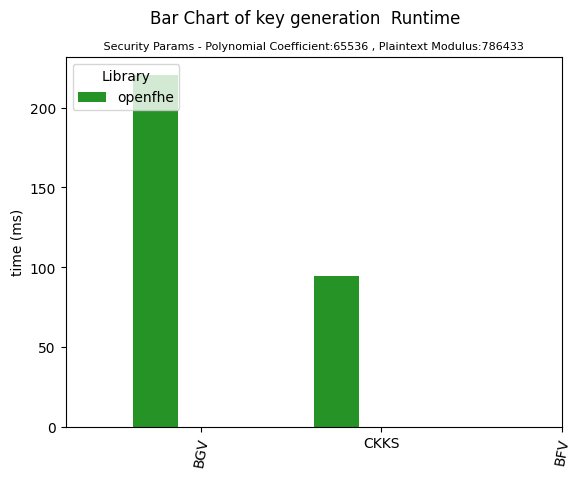

In [409]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Initialize bgvdata as an empty list
bgvdata = []
ckksdata = []
bfvdata = []
libraries = []
colors = ['green', 'orange', 'purple', 'cyan']
bgv_colors = ['blue', 'green', 'red', 'cyan']
ckks_colors= ['orange', '', 'pink', 'brown']
labels = ['BGV', 'CKKS', 'BFV']

securityParams = ['16384','32768', '65536']

Plaintext_modulus = 786433
target_value = 65536
poly_coeff = target_value

# Read data from CSV files into a dictionary of DataFrames
for file, columns in [('helib_averages.csv', ['bgvkeygenRtime', 'ckkskeygenRtime']),
                      ('openfhe_averages.csv', ['bgvkeygenRtime', 'ckkskeygenRtime','bfvkeygenRtime']),
                      ('seal_averages.csv', ['bgvkeygenRtime', 'ckkskeygenRtime','bfvkeygenRtime'])]:
    df = pd.read_csv(file)
    filtered_data = df[df['securityParam'] == target_value]
    filtered_data = filtered_data[columns]
    bgvdata.extend(filtered_data['bgvkeygenRtime'].values)
    ckksdata.extend(filtered_data['ckkskeygenRtime'].values)
    if 'bfvkeygenRtime' in filtered_data.columns:
        bfvdata.extend(filtered_data['bfvkeygenRtime'].values)
    else:
        bfvdata.extend({0})
    libraries.extend([file.split('_')[0]] * len(filtered_data))

# Set the width of the bars
bar_width = 1
index = np.arange(len(bgvdata))

# Plotting the bars chart with colored bars
for i, (x, bgv, library) in enumerate(zip(index, bgvdata, libraries)):
    plt.bar(x+2, bgv, width=bar_width, color=colors[i % len(colors)],  alpha=0.85, label=library)

for i, (x, ckks, library) in enumerate(zip(index, ckksdata, libraries)):
    plt.bar(x+6, ckks, width=bar_width, color=colors[i % len(colors)],  alpha=0.85)

for i, (x, ckks, library) in enumerate(zip(index, bfvdata, libraries)):
    plt.bar(x+10, ckks, width=bar_width, color=colors[i % len(colors)],  alpha=0.85)

plt.ylabel('time (ms)')
plt.suptitle('Bar Chart of key generation  Runtime', fontsize=12)
plt.title(f' Security Params - Polynomial Coefficient:{poly_coeff} , Plaintext Modulus:{Plaintext_modulus} ',fontsize=8)
plt.xticks(index, range(len(bgvdata)))
plt.xticks(rotation=80)
tick_positions = [3, 7, 11]
plt.xticks(tick_positions, labels)
plt.legend(title='Library', loc='upper left')
plt.show()